## Exploring COVID-19 tests by location (NSW)
Data Source - [data.gov.au](https://data.gov.au/dataset/ds-nsw-60616720-3c60-4c52-b499-751f31e3b132/details?q=COVID-19)

COVID-19 tests by date and postcode, local health district, and local government area. The dataset is updated daily, except on weekends.

The data is for COVID-19 tests and is based on where a person has been tested and is undergoing public health management at the time of the test. A surge in total number of people tested on a particular day may occur as the test results are updated in batches and new laboratories gain testing capacity.

The underlying dataset was assessed to measure the risk of identifying an individual and the level of sensitivity of the information gained if it was known that an individual was in the dataset. The dataset was then treated to mitigate these risks, including suppressing and aggregating data.

1. There has been a recent spike in NSW cases and testing has increased across the state
2. The data analysis created below can be used to notify people who live in high testing districts

### Importing the source data, cleansing and creating new dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('covid-19-tests-by-date-and-postcode-local-health-district-and-local-government-area.csv')

In [3]:
df['postcode'] = df['postcode'].apply(str)

In [4]:
df['postcode'] = df['postcode'].replace('\.0','',regex=True)

In [5]:
df.dropna(inplace=True)

In [6]:
df = df.rename(columns={'lhd_2010_name':'district','lga_name19':'area'})

In [7]:
data = df[['test_date','postcode','district','area']]

### Test cases by date
1. Testing commenced on the 1st of January 2020
2. In early June testing started to pick up again
3. In the first week of July NSW recorded the most completed tests YTD

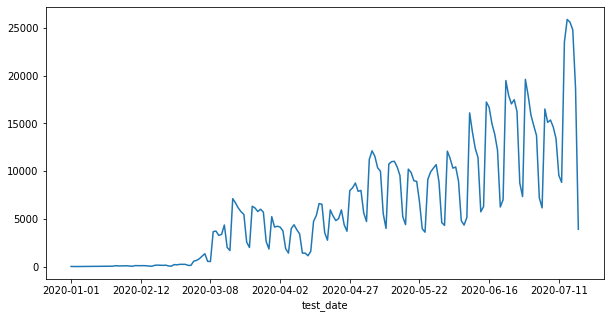

In [8]:
data.groupby('test_date').size().plot(kind='line',figsize=(10,5))
plt.show()

### Test cases by District, Area and Post Code. Sorted by highest results. Top 10 post codes

In [9]:
data.groupby(['district','area','postcode']).size().sort_values(ascending=False).head(10)

district               area                     postcode
South Western Sydney   Liverpool (C)            2170        17566
                       Campbelltown (C) (NSW)   2560        14174
                       Camden (A)               2570        11562
Nepean Blue Mountains  Penrith (C)              2747        10993
Western Sydney         Cumberland (A)           2145        10842
Central Coast          Central Coast (C) (NSW)  2250        10426
Nepean Blue Mountains  Penrith (C)              2750        10178
Western Sydney         The Hills Shire (A)      2155        10157
                       Blacktown (C)            2148         9851
                       The Hills Shire (A)      2153         8560
dtype: int64

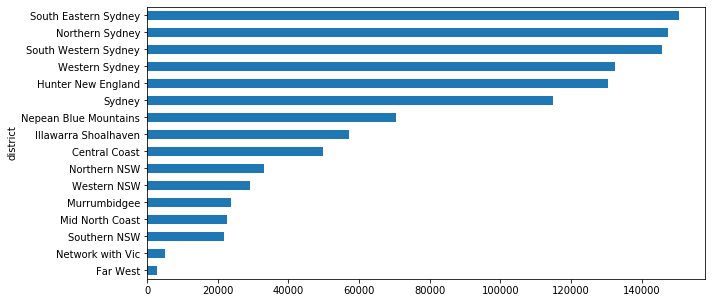

In [10]:
data.groupby('district').size().sort_values().plot(kind='barh',figsize=(10,5))
plt.show()

### COVID-19 tests conducted in the last week

In [11]:
lw = data[data['test_date']>='2020-07-13']

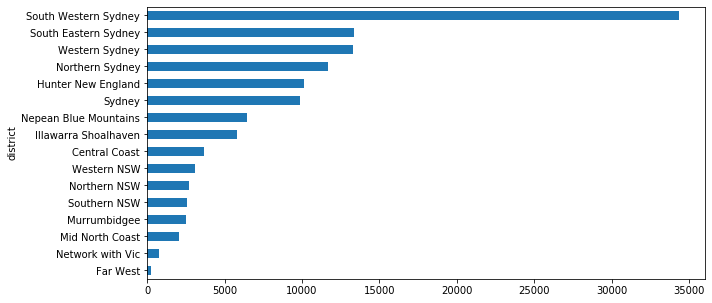

In [12]:
lw.groupby('district').size().sort_values().plot(kind='barh',figsize=(10,5))
plt.show()

In [13]:
lw.groupby(['district','area','postcode']).size().sort_values(ascending=False).head(10)

district              area                    postcode
South Western Sydney  Liverpool (C)           2170        4930
                      Campbelltown (C) (NSW)  2560        3657
                      Camden (A)              2570        2428
                                              2567        1794
                      Liverpool (C)           2171        1681
                                              2168        1333
                      Campbelltown (C) (NSW)  2566        1258
Western Sydney        Cumberland (A)          2145        1248
South Western Sydney  Fairfield (C)           2176        1234
                      Campbelltown (C) (NSW)  2565        1212
dtype: int64